## Analyzing the AirBnb Seattle Dataset following the CRISP-DM process. 

## 1. Business Understanding

In this Notebook, we analyse the AirBnb Seattle Dataset following the CRISP-DM process (Cross-Industry Standard
Process for Data Mining), a standard for analyzing data that consists of six major phases:

1.	Business Understanding
2.	Data Understanding
3.	Data Preparation
4.	Modeling
5.	Evaluation
6.	Deployment

For an initial data exploration and to gain a better business understanding of the domain, we will answer the following questions:

1.	What is the distribution of prices among neighbourhoods?
2.  Are there more conditions towards renters for renting expensive listings?
3.  What are the aspects of a listing that correlate most with the price of a listing?
4.	To what extent can we predict the market price for new listings?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import data
df = pd.read_csv('./Project 1/listings.csv')

## 2. Data Understanding

In this step, we will get more familiar with the Seattle Airbnb data. We will verify the data quality by looking at the number of missing values, (unexpected) datatypes and format of the features. Besides, we will visualizing correlations and distributions of the data.

In [3]:
# Shape
df.shape

(3818, 92)

In [4]:
# Head
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# General statistics
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


**MISSING VALUES**

In [6]:
# Number of missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True, ascending=False)
missing_values

license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
reviews_per_month               627
first_review                    627
last_review                     627
space                           569
host_response_time              523
host_response_rate              523
neighbourhood                   416
thumbnail_url                   320
medium_url                      320
xl_picture_url              

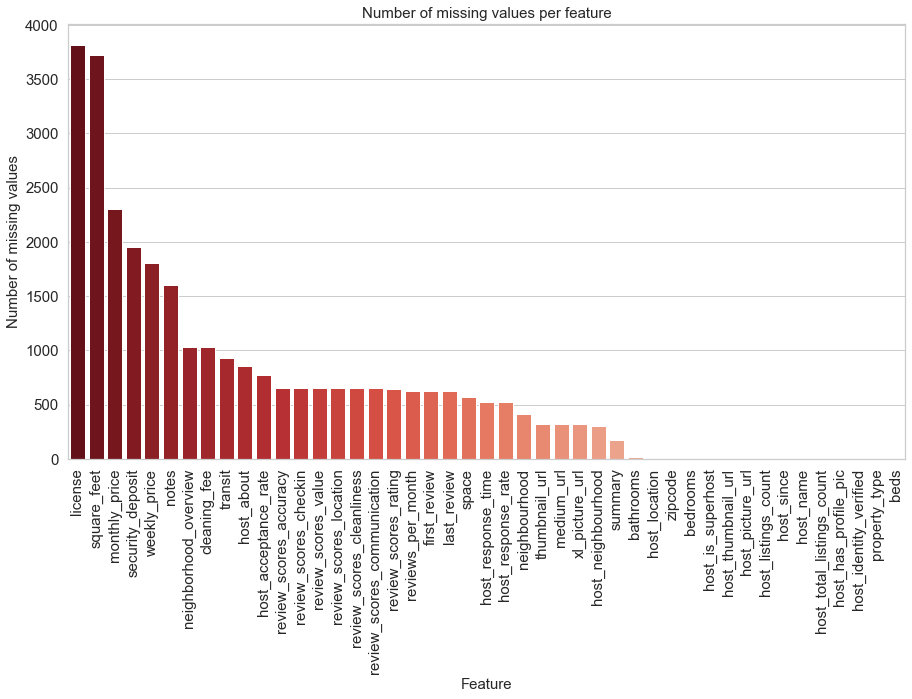

In [7]:
# Plot of the number of missing values
missing_values = missing_values.to_frame()
missing_values.columns = ['Number of missing values']
missing_values.index.names = ['Feature']
missing_values['Feature'] = missing_values.index

# Barplot
sns.set(style="whitegrid", color_codes=True, rc = {'figure.figsize':(15,8)})
sns.barplot(x = 'Feature', y = 'Number of missing values', data=missing_values, palette="Reds_r")

# Title and labels
plt.ylabel('Number of missing values', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.title('Number of missing values per feature', fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

**DATA TYPES**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

It seems some variables are labeled incorrectly. For instance: we would expect price or host_acceptance_rate to be numerical instead of categorical. If we take a closer look at these variables we see that they are object types because they contain percentages and dollar signs:

In [9]:
df[['price','host_acceptance_rate']]

,price,host_acceptance_rate
0,$85.00,100%
1,$150.00,100%
2,$975.00,100%
3,$100.00,NaN
4,$450.00,NaN
...,...,...
3813,$359.00,100%
3814,$79.00,100%
3815,$93.00,NaN
3816,$99.00,NaN


**NOTABLE COLUMNS**

In [10]:
# There are some columns with a unique value for each row
for col in df.columns:
    if len(df[col].unique()) == 3818:
        print(col)

id
listing_url
picture_url
latitude
longitude


In [11]:
# Example
df[['id','listing_url']]

,id,listing_url
0,241032,https://www.airbnb.com/rooms/241032
1,953595,https://www.airbnb.com/rooms/953595
2,3308979,https://www.airbnb.com/rooms/3308979
3,7421966,https://www.airbnb.com/rooms/7421966
4,278830,https://www.airbnb.com/rooms/278830
...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950
3814,8902327,https://www.airbnb.com/rooms/8902327
3815,10267360,https://www.airbnb.com/rooms/10267360
3816,9604740,https://www.airbnb.com/rooms/9604740


In [12]:
# There are also columns with the same value for each row
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)

scrape_id
last_scraped
experiences_offered
market
country_code
country
has_availability
calendar_last_scraped
requires_license
license
jurisdiction_names


In [13]:
# Example
df[['market','country']]

,market,country
0,Seattle,United States
1,Seattle,United States
2,Seattle,United States
3,Seattle,United States
4,Seattle,United States
...,...,...
3813,Seattle,United States
3814,Seattle,United States
3815,Seattle,United States
3816,Seattle,United States


**QUESTIONS**

**1. What is the distribution of prices among neighbourhoods?**

C:\Users\anne.klaver\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


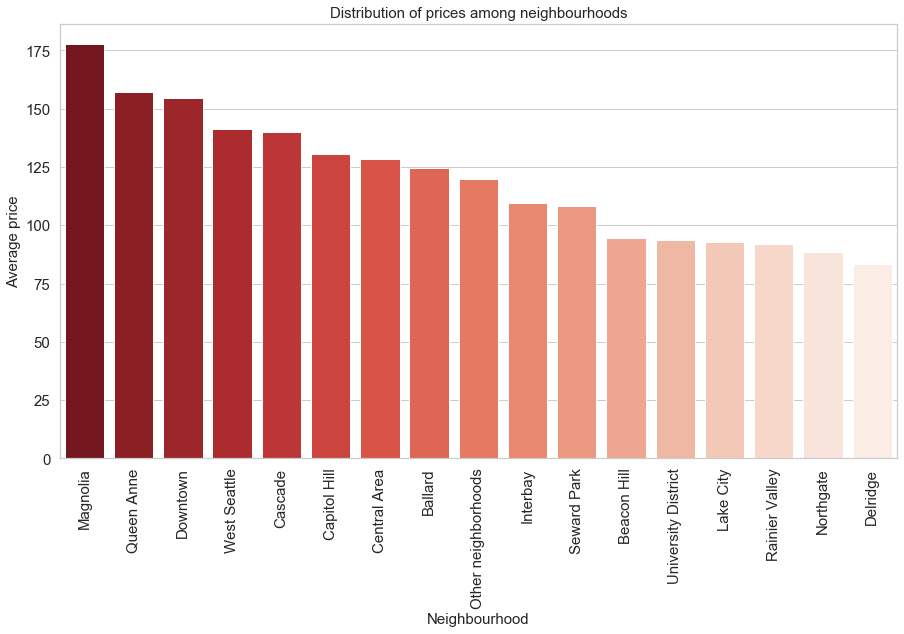

In [14]:
# Distribution of prices among neighbourhoods
temp_df = df[['neighbourhood_group_cleansed', 'price']]
temp_df['price'] = temp_df['price'].str.strip("$").str.replace(",","").astype(np.float64)
order = temp_df.groupby('neighbourhood_group_cleansed').mean().sort_values('price', ascending = False).index

# Barplot
sns.set(style="whitegrid", color_codes='reds', rc = {'figure.figsize':(15,8)})
sns.barplot(x = 'neighbourhood_group_cleansed', y = 'price', data=temp_df, order=order, palette='Reds_r', ci=None)

# Title and labels
plt.ylabel('Average price', fontsize=15)
plt.xlabel('Neighbourhood', fontsize=15)
plt.title('Distribution of prices among neighbourhoods', fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

By looking at the distribution of prices among different neighbourhoods, we see that prices are generally higher for the neighborhoods closest to the center of Seattle.

**2. Are there more conditions towards renters for renting expensive listings?**

In [15]:
# Average price per requirement
temp_df = df[['require_guest_profile_picture','require_guest_phone_verification', 'price']]
temp_df['price'] = temp_df['price'].str.strip("$").str.replace(",","").astype(np.float64)

C:\Users\anne.klaver\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
temp_df.groupby('require_guest_profile_picture').mean().sort_values('price', ascending = False)[['price']]

,price
require_guest_profile_picture,
t,146.828660
f,126.245639


In [17]:
temp_df.groupby('require_guest_phone_verification').mean().sort_values('price', ascending = False)[['price']]

,price
require_guest_phone_verification,
t,143.725333
f,126.260819


By looking at the results above, we can conclude that there are more conditions towards renters for renting expensive listings.

**3. What are the aspects of a listing that correlate most with the price of a listing?**

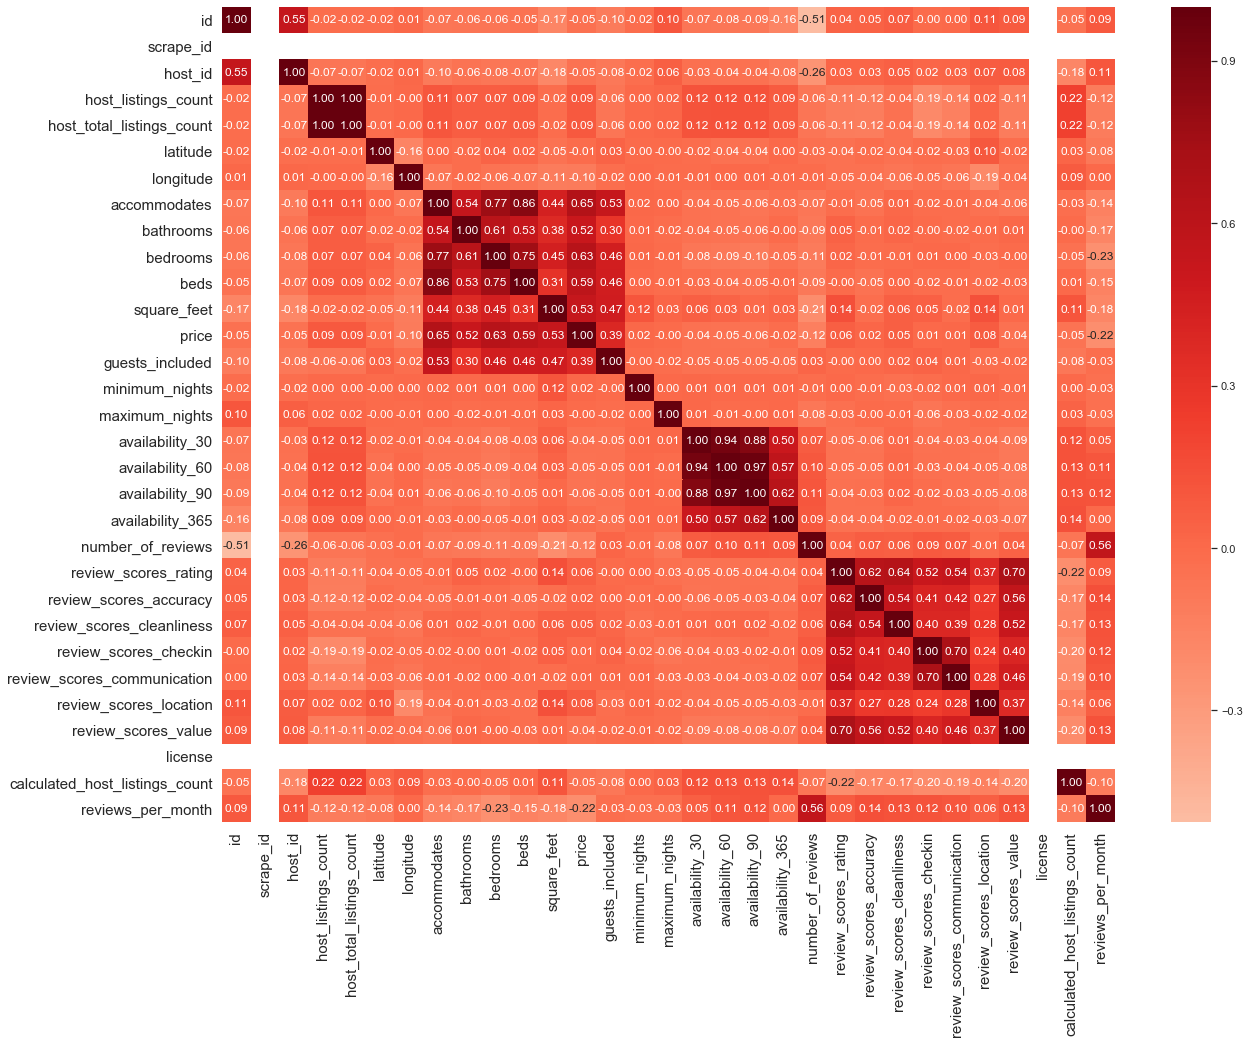

In [18]:
# Correlations of numerical variables in df:
df['price'] = df['price'].str.strip("$").str.replace(",","")
df['price'] = df['price'].astype(np.float64)

plt.subplots(figsize=(20,15))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Reds', center=0)

From the correlations heatmap we see that the listing price is strongly correlated with the features accommodates, bathrooms, bedrooms, beds, square_feet and guests_included.

## 3. Data Preparation

In this step we will organize the data for modeling.

**Only relevant features**

Before we start cleaning the data, we will only store the relevant features that we will use to predict the price of a new listing in our final dataset. Hence, we will remove:

- Dates
- Free text format
- Features with mostly missing values
- Features that are unique for each observation
- Features that are the same for each observation
- Features that are unknown for new listings
- etc...


In [19]:
df = df[['host_location', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month','host_is_superhost', 'latitude', 'longitude','host_response_rate','host_response_time']]

**Data types and Format**

As we have seen in the previous step (data understanding), some features are incorrectly labeled as categorical features (because they contain percentages and dollar sigsn). Therefore, we will change the format and label them correctly als numerical features.

In [20]:
# Function to remove the percentages from the object
def strip_percentages(df, column):
    '''
    INPUT:
    df - (pandas dataframe) df as defined above
    column - (str) column name
    
    OUTPUT:
    Format of the desired column is changed (percentages have been removed)
    
    '''
    
    df[column] = df[column].str.strip("%")

# Function to remove the dollar signs and commas from the object
def strip_prices(df, column):
    '''
    INPUT:
    df - (pandas dataframe) df as defined above
    column - (str) column name
    
    OUTPUT:
    Format of the desired column is changed (dollar signs and commas have been removed)
    
    '''
        
    df[column] = df[column].str.strip("$").str.replace(",","")

In [22]:
# Columns containing dollar signs
prices = ['cleaning_fee','extra_people']
for column in prices:
    strip_prices(df, column)

# Columns containing percentages
percentages = ['host_response_rate']
for column in percentages:
    strip_percentages(df, column)

In [23]:
# Manually determine which variables should be categorical and numerical
cat = ['bed_type', 'cancellation_policy', 'host_has_profile_pic', 'host_identity_verified', 'host_location',
       'host_neighbourhood', 'instant_bookable', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'require_guest_phone_verification', 'require_guest_profile_picture', 'room_type', 'host_is_superhost','host_response_time']

num = ['accommodates','bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count', 'cleaning_fee', 'extra_people', 'guests_included',
       'host_listings_count', 'host_total_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price',
       'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 
       'review_scores_location','review_scores_rating', 'review_scores_value', 'reviews_per_month', 'longitude', 'latitude', 'host_response_rate']

In [24]:
# Make sure all numeric columns are actually numeric
df[df[num].select_dtypes('object').columns] = df[df[num].select_dtypes('object').columns].astype(np.float64)

In [25]:
# Subset of df with only categorical variables:
cat_columns = df.select_dtypes(include=['object']).columns
# Subset of df with only numerical variables:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [26]:
# Check if all data types meet expectations 
print(list(set(cat)-set(cat_columns)))
print(list(set(num)-set(num_columns)))

[]
[]


**Missing values**

Handling missing values is one of the most important steps during the data preparation step, as most machine learning algorithms do not support missing values. Therefore, we will either delete rows if all values are missing, or impute missing values with the mean for numerical features, and the mode for categorical features.

In [27]:
# Remove rows with all values missing
df = df.dropna(how='all')

# Remove rows with missing values for price
df = df.dropna(subset=['price'])

In [28]:
# Fill missing values with mean (for numerical features)
for col in num:
    df[col] = df[col].fillna(df[col].mean())
    
# Fill missing values with mode (for categorical features)
for col in cat:
    df[col] = df[col].fillna(df[col].mode()[0])

**DUMMY VARIABLES**

In [29]:
# Categorical features to dummy variables
df = pd.get_dummies(df, columns=cat)

## 4. Modeling

We will apply hyperparameter tuning to our Random Forest Regressor to optimize the price prediction for newly added listings.

In [30]:
# Define grid for random grid search
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators.append(10)
n_estimators.append(50)
n_estimators.append(100)
n_estimators.append(150)
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 10, 50, 100, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [35]:
# Df of variables which we will use to predict
X = df.drop(['price'], axis=1)

# Df of variable we want to predict
y = df['price']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Initialize model
rf = RandomForestRegressor()

# Randomized search on hyperparameters
rf_random = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 10, cv = 5,verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

# Fit model to training data
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000, 10, 50,
                                                         100, 150]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
# Best parameter settings after parameter tuning
rf_random.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=1400)

## 5. Evaluation

To evaluate the performance of our model, we will look at the MSE (Mean Squared Error) and R2 score.

In [37]:
# Predict on test data
y_test_preds = rf_random.predict(X_test)

In [38]:
# Score model on test data
print(mean_squared_error(y_test,y_test_preds))
print(r2_score(y_test,y_test_preds))

3123.5106814452124
0.6352551202873227


The plot below shows that the Random Forest Regressor is not performing very well for listings with a high price, this could be caused by the fact that there is a lack of samples in the training data of listing with a high renting price.

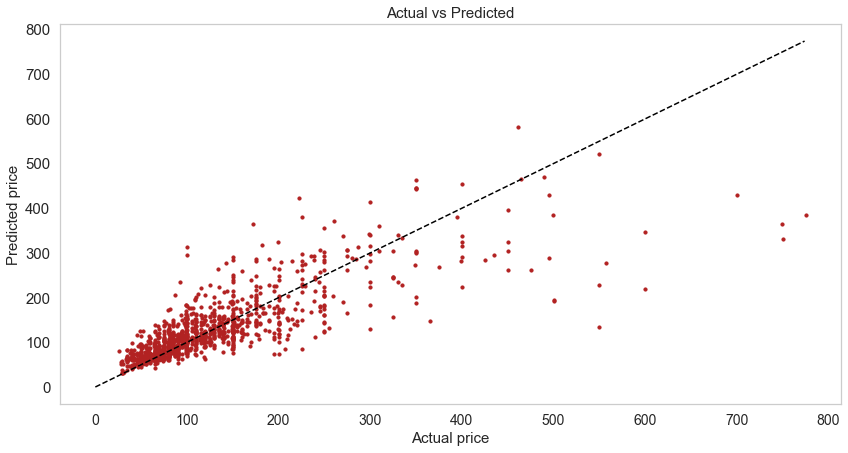

In [39]:
# Scatter plot of the actual price versus the predicted price
plt.figure(figsize=(14,7))
marker_size = 10
plt.scatter(y_test, y_test_preds, s=marker_size, color='firebrick')

#Scatter plot
max_ = round(max(max(y_test), max(y_test_preds)))
plt.plot(range(max_), range(max_), color='black', linestyle='dashed')

#Title and labels
plt.xlabel("Actual price", fontsize=15)
plt.ylabel("Predicted price", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=14)
plt.title("Actual vs Predicted", fontsize=15)
plt.grid(False)

plt.show()

To find out which features were most important for an accurate prediction of the price, we plot the feature importance score of the features. The top 10 most important features are shown below. By looking at this plot, we see that "bedrooms" is by far the most important feature for predicting the price.

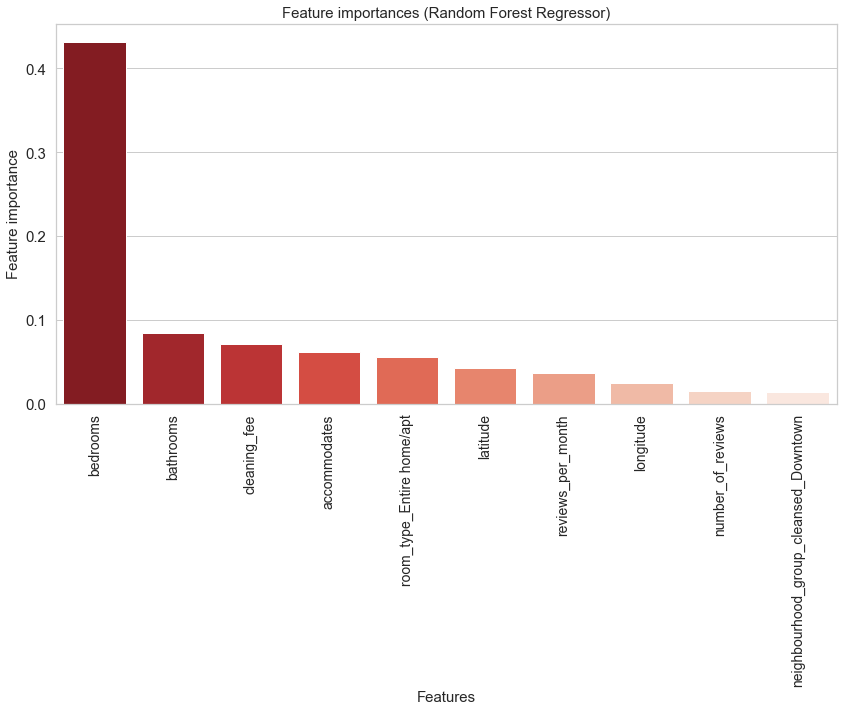

In [40]:
# Get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf_random.best_estimator_.feature_importances_), key=lambda x: x[1] * -1)
df_feature_importances = pd.DataFrame(values, columns = headers)
df_feature_importances = df_feature_importances.sort_values(by = ['score'], ascending = False)

features = df_feature_importances['name'][:10]
scores = df_feature_importances['score'][:10]

# Plot feature importances
sns.set(style="whitegrid", color_codes=True, rc = {'figure.figsize':(14,7)})
sns.barplot(features, scores, palette="Reds_r")

# Titles and lables
plt.yticks(fontsize=15)
plt.xticks(rotation = 90, fontsize=14)
plt.ylabel('Feature importance', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.title('Feature importances (Random Forest Regressor)', fontsize=15)
 
plt.show()